## 머신러닝 7과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA)
5. 모델 선택 및 하이퍼파라미터 조절
6. 모델 학습
7. 평가 

### 1. 문제 정의 
- BMI 지수 구해보자
- 500명의 키와 몸무게 비만도 데이터를 활용하여 비만을 판단하는 모델을 만들어보자.

In [1]:
#필요한 라이브러리 불러오기 
import pandas as pd
import matplotlib.pyplot as plt
#머신러닝 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier # KNN 분류모델을 사용하는겁니다.

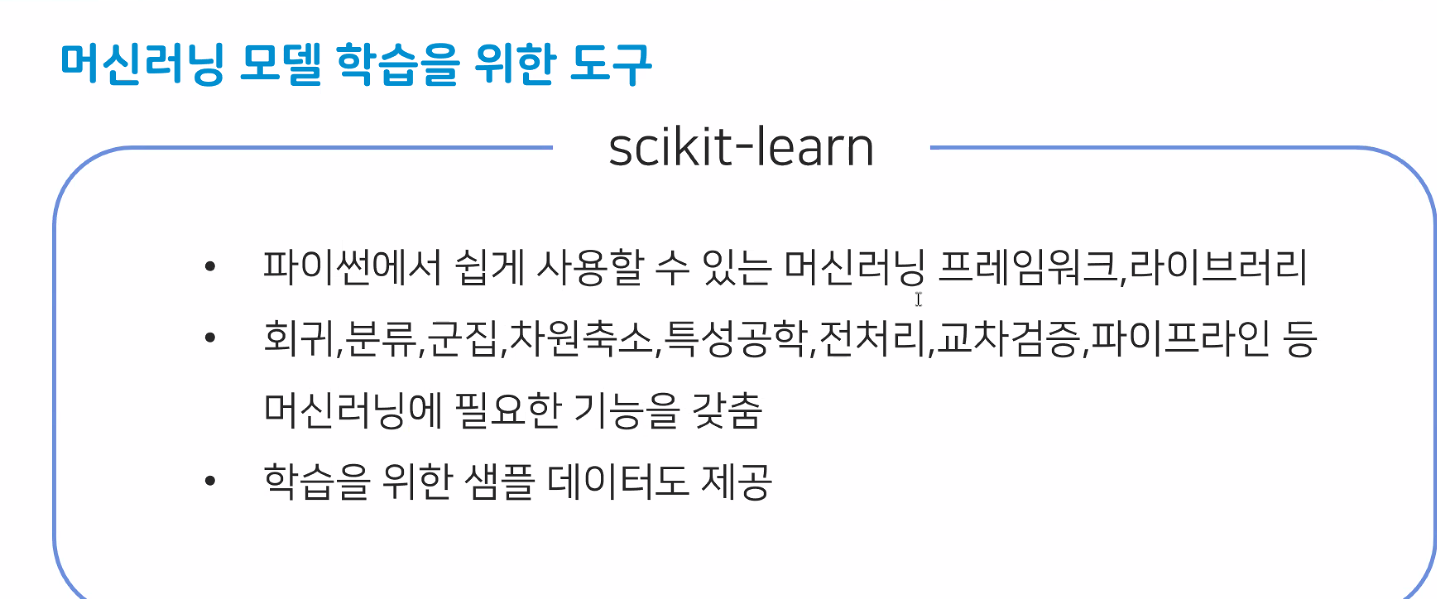

# 2. 데이터 불러오기
- 결측치 확인

In [2]:
#데이터 불러오기 (CSV 파일)
#pd.read_csv('파일명.확장자')
import data
data=pd.read_csv('bmi_500.csv', index_col="Label")

In [3]:
#데이터 크기확인-> (행,열)
data.shape

(500, 3)

In [4]:
#데이터 정보확인 (결측치 여부 확인해야하기에)
data.info()
#어떤 데이터 타입인지 확인하는것도 중요하다!! 
#(머신러닝은 문자열을 학습할수 없기에!) -> 수치형태로 변경해줘야한다! 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [5]:
#Label 데이터 (정답)확인!  ==> 범주형 형태의 데이터 -> 분류모델을 사용해야겠다!
#총 6개의 class(정답들)를 가지구나! 
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 3. 데이터전처리 
- 데이터 전처리 필요없음 (결측치 X ,이상데이터X, 수치형 데이터임으로)

## 4 탐색적 데이터 분석 EDA (Exploratory Data Analysis)
- 데이터들을 분석하고 조사하여 주요 특성들을 파악
- 시각화를 통해서 데이터의 분포현황을 살펴보기
- 기술통계량 확인 (데이터에 대해 통계적으로 설명한것)

In [6]:
#기술통계 확인
data.describe()
#mean(평균)과 50%중위값을 비교해봤을때 값이 비슷하다면 이상치의 영향을 받지않고있음을 확인.

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [7]:
#데이터 시각화(bmi 레이블별로 분포현황) 
EO=data.loc['Extreme Obesity']
#iloc => 인덱스 숫자를 통해서 가져온다.


#plt.scatter(X축,Y축)

In [8]:
eo=pd.DataFrame(EO)


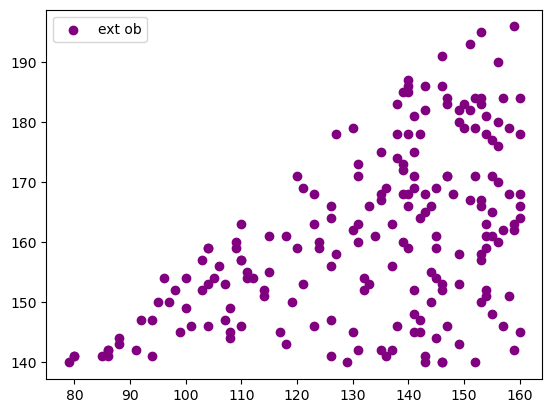

In [9]:
plt.scatter(eo.Weight,eo.Height,c='purple',label='ext ob')
#범례 
plt.legend()


In [10]:
O=data.loc['Obesity']

In [11]:
o=pd.DataFrame(O)

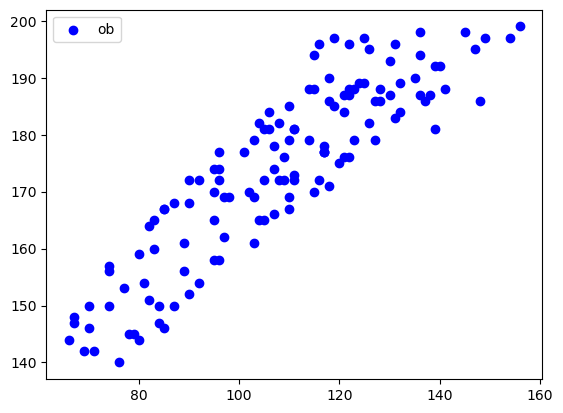

In [12]:
plt.scatter(o.Weight,o.Height,c='blue',label='ob')
plt.legend()

In [13]:
Ow=data.loc['Overweight']

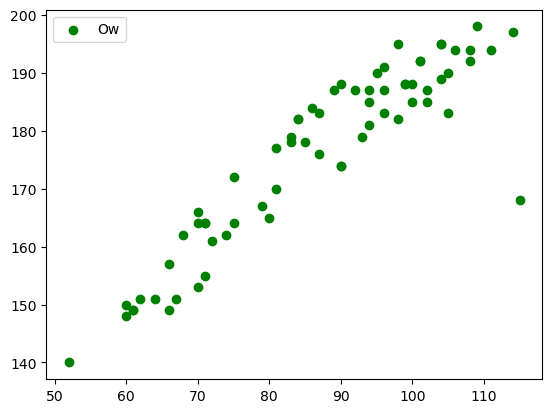

In [14]:
ow=pd.DataFrame(Ow)
plt.scatter(ow.Weight,ow.Height,c='green',label='Ow')
plt.legend()

In [15]:
F.loc['Obesity']


NameError: name 'F' is not defined

In [16]:
def graph_draw(label,color):
    d=data.loc[label]
    plt.scatter(d.Weight,d.Height,c=color,label=label)
    plt.legend()
    

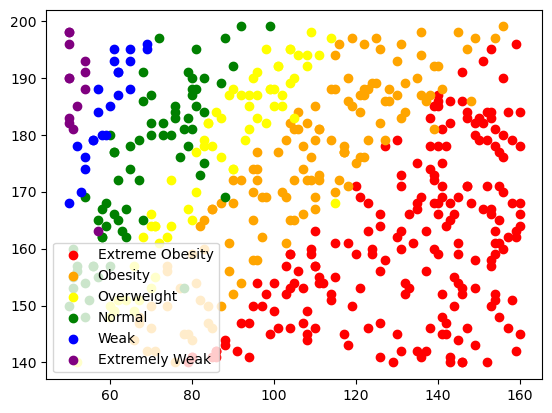

In [17]:
graph_draw('Extreme Obesity', 'red')
graph_draw('Obesity','orange')
graph_draw("Overweight",'yellow')
graph_draw('Normal','green')
graph_draw("Weak",'blue')
graph_draw("Extremely Weak",'purple')
plt.legend()
plt.show()

## 5.모델링
- 문제데이터와 답데이터로 분리해주고
- 7:3으로도 분리하도록해야합니다.

In [18]:
data
# 문제데이터: 키,몸무게
# 정답데이터: Label
X=data[['Weight','Height']]
y=data.index

#확인
print(X.shape)
print(y.shape)







(500, 2)
(500,)


In [19]:
X_train=X.iloc[0:350]
X_test=X.iloc[350:]
y_train=y[0:350]
y_test=y[350:]

In [20]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

                 Weight  Height
Label                          
Obesity              96     174
Normal               87     189
Obesity             110     185
Overweight          104     195
Overweight           61     149
...                 ...     ...
Obesity             106     184
Normal               68     191
Normal               58     162
Extreme Obesity     138     178
Normal               60     157

[350 rows x 2 columns]
                 Weight  Height
Label                          
Normal               83     184
Normal               88     197
Normal               51     160
Extreme Obesity     153     184
Extremely Weak       50     190
...                 ...     ...
Extreme Obesity     153     150
Obesity             121     184
Extreme Obesity     136     141
Extreme Obesity      95     150
Extreme Obesity     131     173

[150 rows x 2 columns]
Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obes

### 5. 모델객체생성 및 하이퍼파라미터조절

- 현재 모델링보다는 머신러닝 전체과정에 치중 

In [21]:
#머신러닝 패키지 (라이브러리) sklearn
from sklearn.neighbors import KNeighborsClassifier #KNN분류모델
from sklearn.metrics import accuracy_score # 정확도 측정 도구

In [22]:
#모델객체생성
knn_model=KNeighborsClassifier(n_neighbors=2)
## 뒤에 매개변수가 하이퍼파라미터 조절하는 부분입니다.

In [23]:
#아직은 생성만 했을뿐 학습 이전단계입니다

### 6.모델학습

In [24]:
#모델.fit(훈련용문제,훈련용 답)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
pre=knn_model.predict(X_test)

C:\Python\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 7.평가
- accuracy_score(pre(학습후 테스트용 문제를 푼 결과), 테스트용 정답)

In [26]:
accuracy_score(pre,y_test)

0.8933333333333333